# SENG 474 - Project
## Data Science Job Salaries
### Chris Colomb (V00970873), Maika Rabenitas (V00970890)

#### Motivation
With the emergence of the AI boom, characterized by rapid advancements in artificial intelligence and machine learning technologies, the relevance and appeal of data science have grown. More individuals are recognizing the potential of data science as a career path, leading to a surge in interest within the field.

In the current job market, the demand for skilled data science professionals is evident across various industries and regions. As organizations increasingly rely on data-driven decision-making processes, the role of data scientists has become indispensable in extracting actionable insights from vast datasets. The intricacies of job salaries within the data science domain reflect a complex interplay of factors such as experience level, employment type, and geographic location.

Moreover, the advent of remote work and flexible arrangements has reshaped traditional notions of workplace dynamics, prompting a reevaluation of compensation models. Analyzing how remote work influences salary determinants offers valuable insights for both employers and employees navigating this evolving landscape.

Furthermore, disparities in compensation based on company size, job title, and employee residence underscore the multifaceted nature of salary determination in data science. Startups may offer competitive salaries to attract top talent, while larger corporations may provide additional perks and benefits. By examining these nuances, our project aims to provide a comprehensive understanding of salary dynamics within the data science industry.

Through data collection, preprocessing, visualization, and mining, our project seeks to uncover patterns and trends that shape salary structures. Ultimately, our endeavor is to contribute to greater transparency and equity in the job market, fostering an environment where both job seekers and employers can make informed decisions.

#### About the Dataset

The dataset has total of 12 features. The breakdown of the features is as follows:
- `id`: A unique identifier for each row
- `work_year`: The year the salary was paid
- `experience_level`: EN - Entry Level, MI - Mid Level, SE - Senior Level, EX - Executive Level/Director
- `employment_type`: FT - Full Time, CT - Contract, FL - Freelance
- `job_title`: The role workd in during the year
- `salary`: The total gross salary amount paid
- `salary_currency`: The currency of the salary paid as an ISO 4217 currency code
- `salary_in_usd`: The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com)
- `employment_residence`: Employee's primary country of residence in during the work year as an ISO 3166 country code
- `remote_ratio`: The overall amount of work done remotely, possible values are - as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)
- `company_location`: The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)
- `company_size`: The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)

In [3]:
# import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ds_salary = pd.read_csv("ds_salaries.csv")
ds_salary.head()

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
ds_salary.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


There are 607 instances in the dataset. We can see that each attribute has 607 non-null values, which means that there are no missing values in the dataset.

In [5]:
# Shows the summary of the numerical attributes
ds_salary.describe()

,id,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [6]:
# replace the experience level with the full name for better understanding
ds_salary["experience_level"] = ds_salary["experience_level"].replace("EN", "Entry-Level")
ds_salary["experience_level"] = ds_salary["experience_level"].replace("MI", "Mid-Level")
ds_salary["experience_level"] = ds_salary["experience_level"].replace("SE", "Senior-Level")
ds_salary["experience_level"] = ds_salary["experience_level"].replace("EX", "Executive-Level")

# replace the employment type with the full name for better understanding
ds_salary["employment_type"] = ds_salary["employment_type"].replace("FT", "Full-Time")
ds_salary["employment_type"] = ds_salary["employment_type"].replace("PT", "Part-Time")
ds_salary["employment_type"] = ds_salary["employment_type"].replace("CT", "Contract")
ds_salary["employment_type"] = ds_salary["employment_type"].replace("TP", "Temporary")

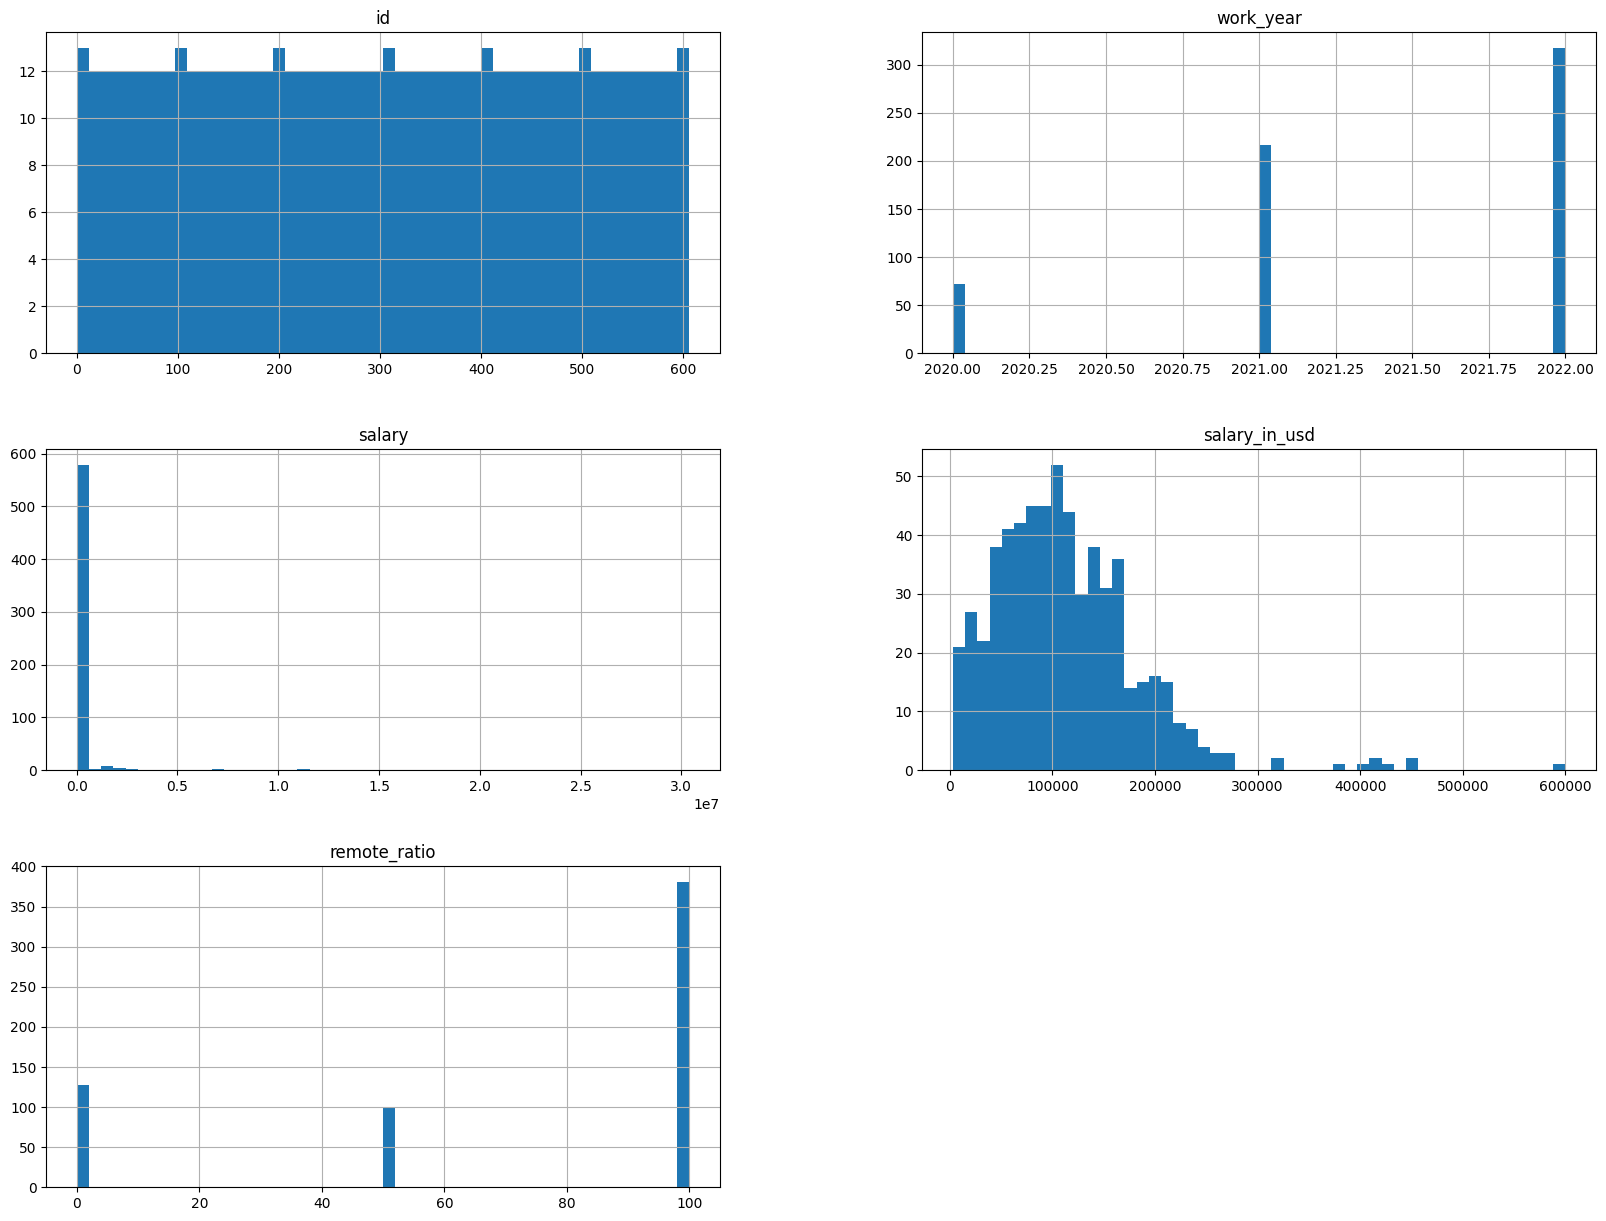

In [7]:
# ds_salary = ds_salary.drop("salary", axis=1)
ds_salary.hist(bins=50,figsize=(20,15))
plt.show()

We will drop the 'id' and 'salary' columns as they are not useful for our analysis. The salary is not useful because the data has different currencies so it is not possible to compare the salaries directly. We will use the 'salary_in_usd' column instead. The 'id' column is not useful because it is just a unique identifier for each row.

In [8]:
# drop the id and salary columns
ds_salary = ds_salary.drop("id", axis=1)
ds_salary = ds_salary.drop("salary", axis=1)